In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import combinations

In [2]:
import sys
import os
sys.path.append(os.path.abspath("../utils"))

In [3]:
import basic_plots as bp
import basic_tests as bt

In [4]:
data = pd.read_csv("../data/raw/turnover.csv")
data.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.3+ KB


# Data Dictionary

`stag:`  Experience (time)  
`event:`  Employee turnover  
`gender:`  Employee's gender, female(f), or male(m)  
`age:`  Employee's age (year)  
`industry:`  Employee's Industry  
`profession:`  Employee's profession  
`traffic:`  From what pipelene employee came to the company. 
    - You contacted the company directly (after learning from advertising, knowing the company's brand, etc.): advert  
    - You contacted the company directly on the recommendation of your friend - NOT an employee of this company: recNErab  
    - You contacted the company directly on the recommendation of your friend - an employee of this company : referal  
    - You have applied for a vacancy on the job site : youjs  
    - The recruiting agency brought you to the employer : KA  
    - Invited by the Employer, we knew him before the employment : friends  
    - The employer contacted you on the recommendation of a person who knows you : rabrecNErab  
    - The employer reached you through your resume on the job site : empjs    
`coach:`  Presence of a coach (training) on probation  
`head_gender:`  head (supervisor) gender  
`greywage:`  The salary does not seem to the tax authorities. Greywage in Russia or Ukraine means that the employer (company) pay just a tiny bit amount of salary above the white-wage (white-wage means minimum wage)  
`way:`  Employee's way of transportation  
`extraversion:`  Extraversion score  
`independ:`  Independend score  
`selfcontrol:`  Selfcontrol score  
`anxiety:`  Anxiety score  
`novator:`  Novator score  

### stag

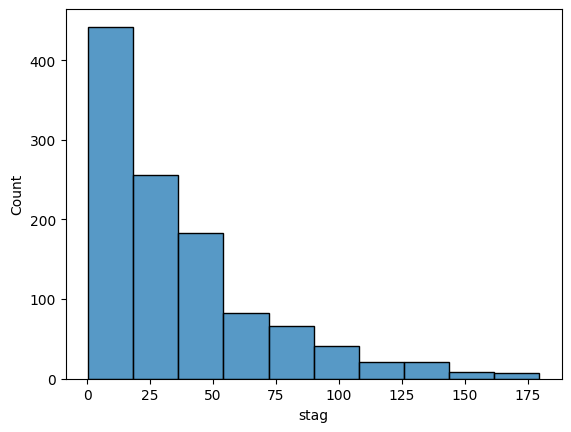

In [6]:
bp.plt_hist(data, "stag")

In [7]:
data["stag"].describe()

count    1129.000000
mean       36.627526
std        34.096597
min         0.394251
25%        11.728953
50%        24.344969
75%        51.318275
max       179.449692
Name: stag, dtype: float64

### event

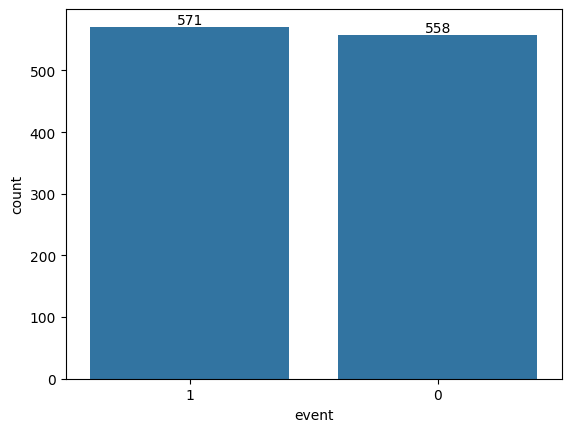

In [8]:
bp.plt_count_x(data, "event", [1, 0])

### gender

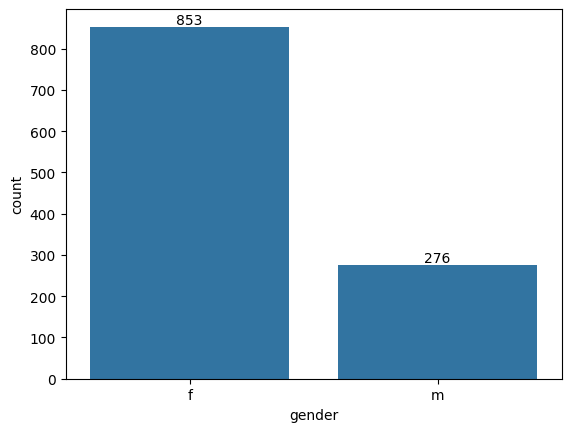

In [9]:
bp.plt_count_x(data, "gender", ["f", "m"])

### age

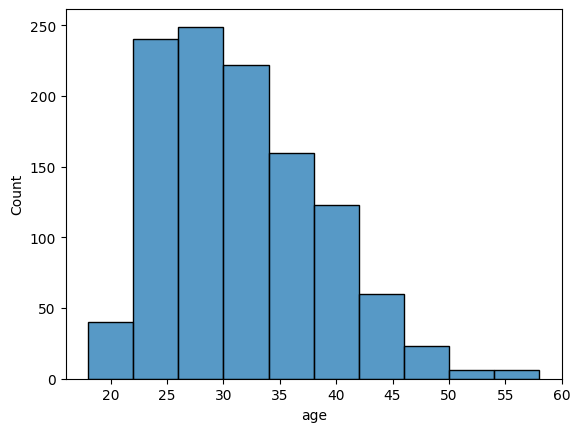

In [10]:
bp.plt_hist(data, "age")

In [11]:
data["age"].describe()

count    1129.000000
mean       31.066965
std         6.996147
min        18.000000
25%        26.000000
50%        30.000000
75%        36.000000
max        58.000000
Name: age, dtype: float64

### industry

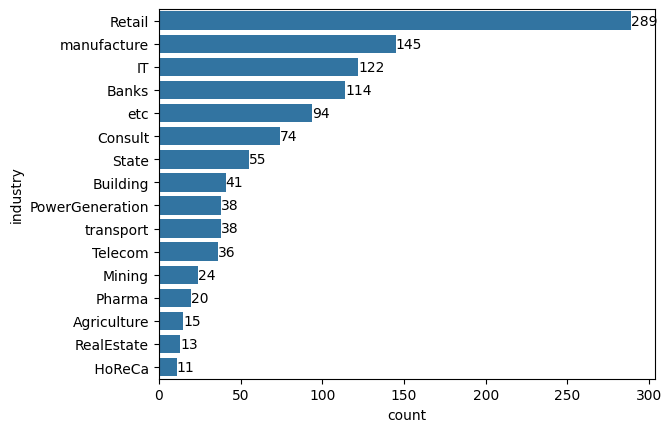

In [12]:
bp.plt_count_y(data, "industry", data["industry"].value_counts().index)

### profession

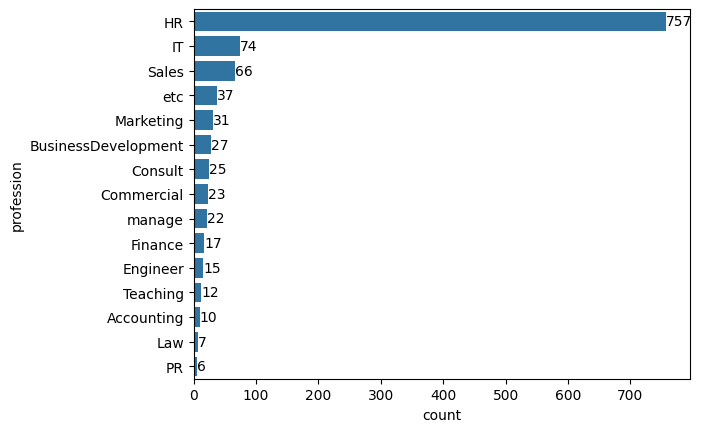

In [13]:
bp.plt_count_y(data, "profession", data["profession"].value_counts().index)

### traffic

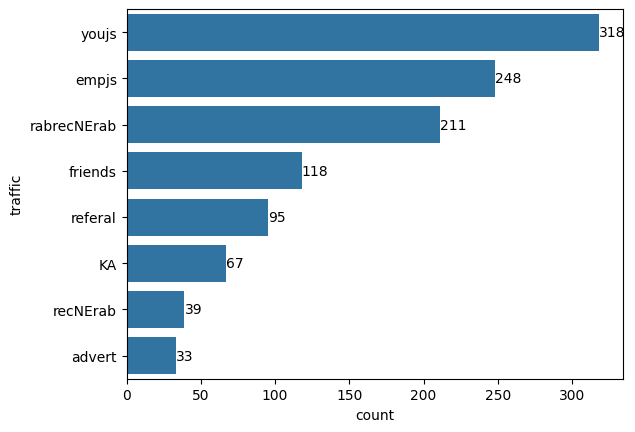

In [14]:
bp.plt_count_y(data, "traffic", data["traffic"].value_counts().index)

- You contacted the company directly (after learning from advertising, knowing the company's brand, etc.): advert  
- You contacted the company directly on the recommendation of your friend - NOT an employee of this company: recNErab  
- You contacted the company directly on the recommendation of your friend - an employee of this company : referal  
- You have applied for a vacancy on the job site : youjs  
- The recruiting agency brought you to the employer : KA  
- Invited by the Employer, we knew him before the employment : friends  
- The employer contacted you on the recommendation of a person who knows you : rabrecNErab  
- The employer reached you through your resume on the job site : empjs  

### coach

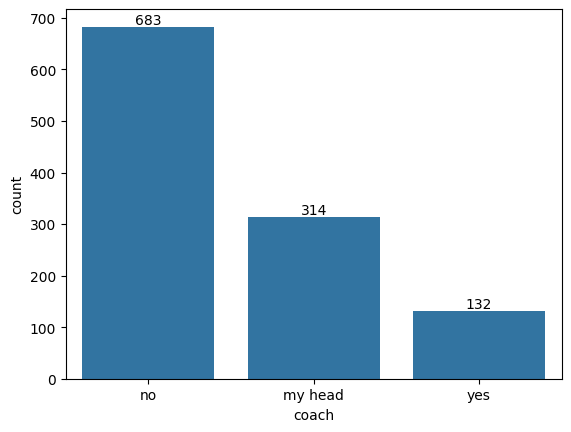

In [15]:
bp.plt_count_x(data, "coach", data["coach"].value_counts().index)

### head_gender

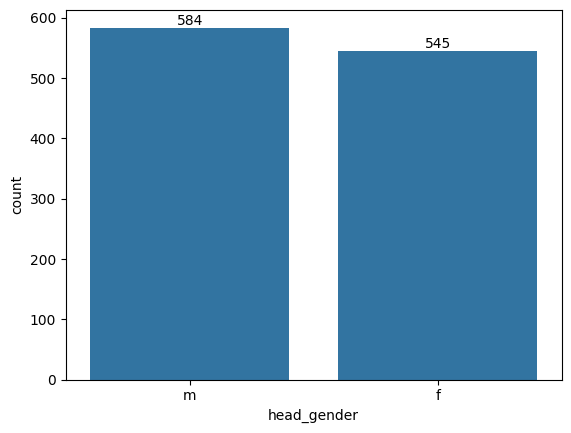

In [16]:
bp.plt_count_x(data, "head_gender", ["m", "f"])

### greywage

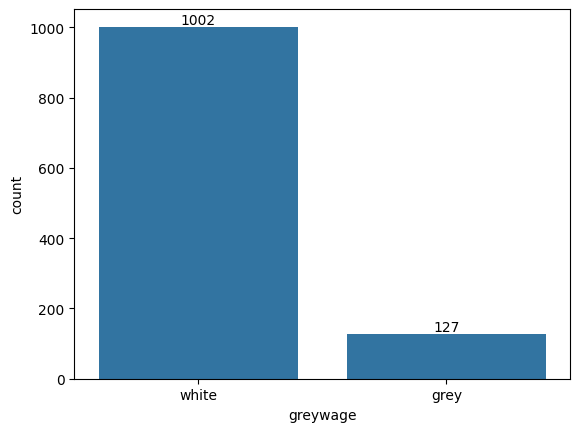

In [17]:
bp.plt_count_x(data, "greywage")

### way

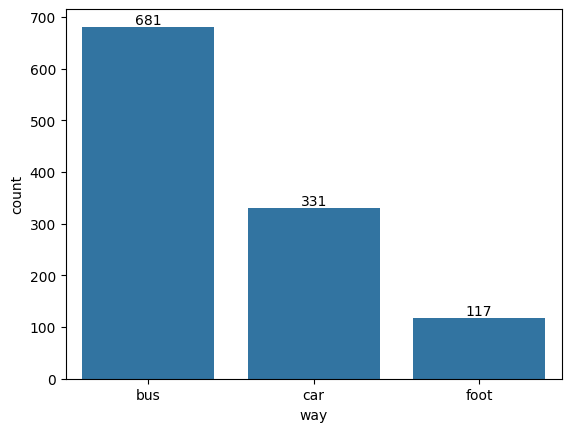

In [18]:
bp.plt_count_x(data, "way")

### extraversion

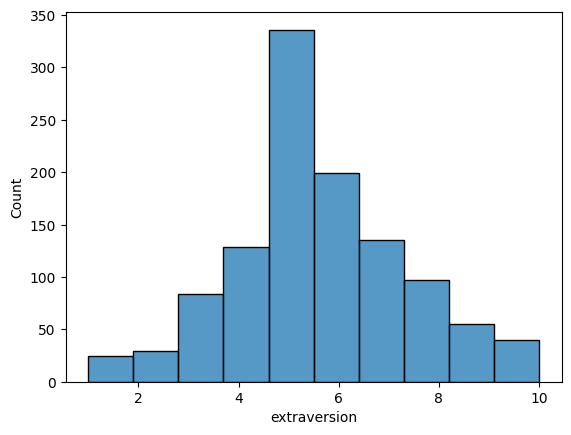

In [19]:
bp.plt_hist(data, "extraversion")

In [20]:
data["extraversion"].describe()

count    1129.000000
mean        5.592383
std         1.851637
min         1.000000
25%         4.600000
50%         5.400000
75%         7.000000
max        10.000000
Name: extraversion, dtype: float64

### independ

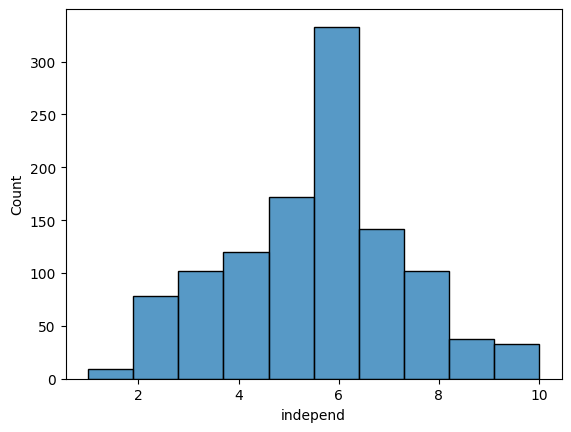

In [21]:
bp.plt_hist(data, "independ")

In [22]:
data["independ"].describe()

count    1129.000000
mean        5.478034
std         1.703312
min         1.000000
25%         4.100000
50%         5.500000
75%         6.900000
max        10.000000
Name: independ, dtype: float64

### selfcontrol

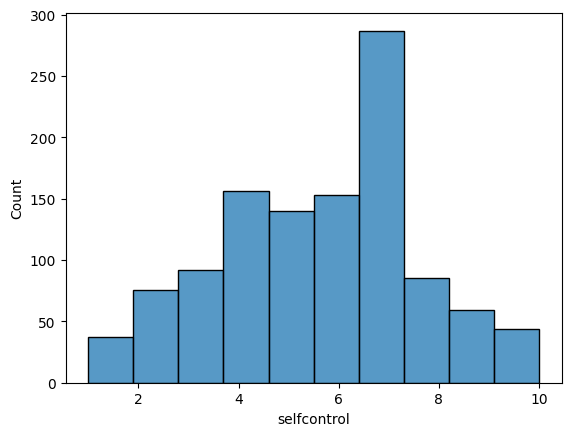

In [23]:
bp.plt_hist(data, "selfcontrol")

In [24]:
data["selfcontrol"].describe()

count    1129.000000
mean        5.597254
std         1.980101
min         1.000000
25%         4.100000
50%         5.700000
75%         7.200000
max        10.000000
Name: selfcontrol, dtype: float64

### anxiety

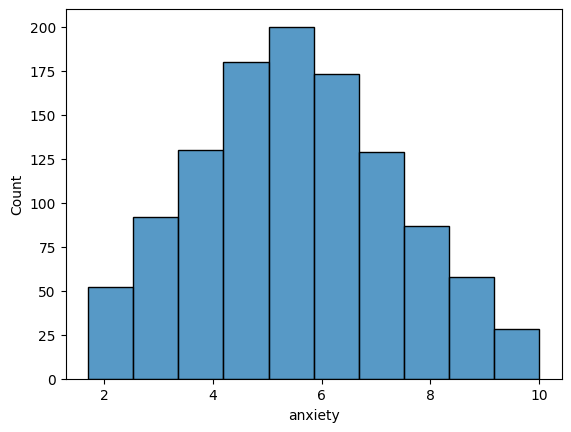

In [25]:
bp.plt_hist(data, "anxiety")

In [26]:
data["anxiety"].describe()

count    1129.000000
mean        5.665633
std         1.709176
min         1.700000
25%         4.800000
50%         5.600000
75%         7.100000
max        10.000000
Name: anxiety, dtype: float64

### novator

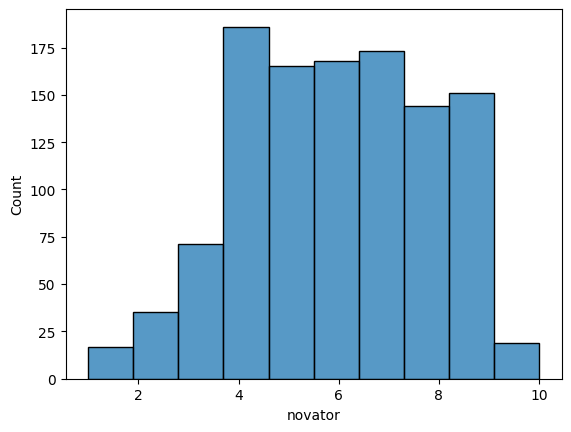

In [27]:
bp.plt_hist(data, "novator")

In [28]:
data["novator"].describe()

count    1129.000000
mean        5.879628
std         1.904016
min         1.000000
25%         4.400000
50%         6.000000
75%         7.500000
max        10.000000
Name: novator, dtype: float64

## Missing Values

In [29]:
data.isna().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

## Correlation Matrix

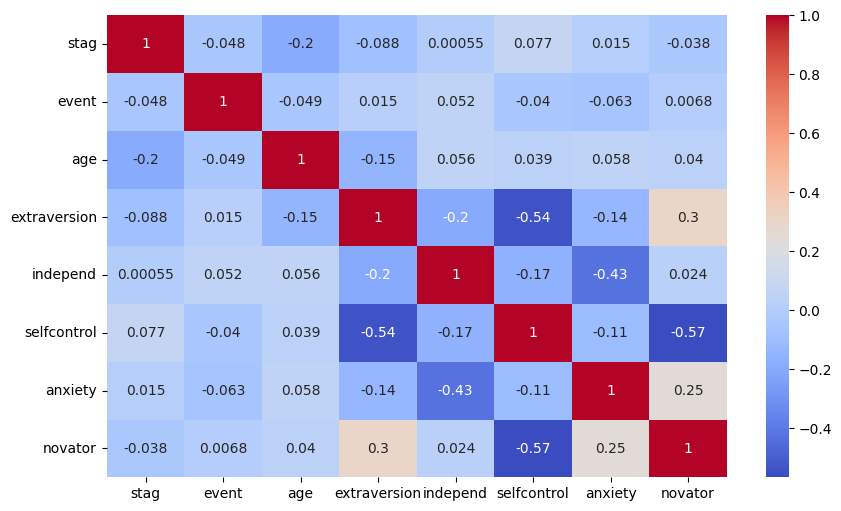

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include = ["int", "float"]).corr(), annot=True, cmap="coolwarm")
plt.show()

## Pairplot

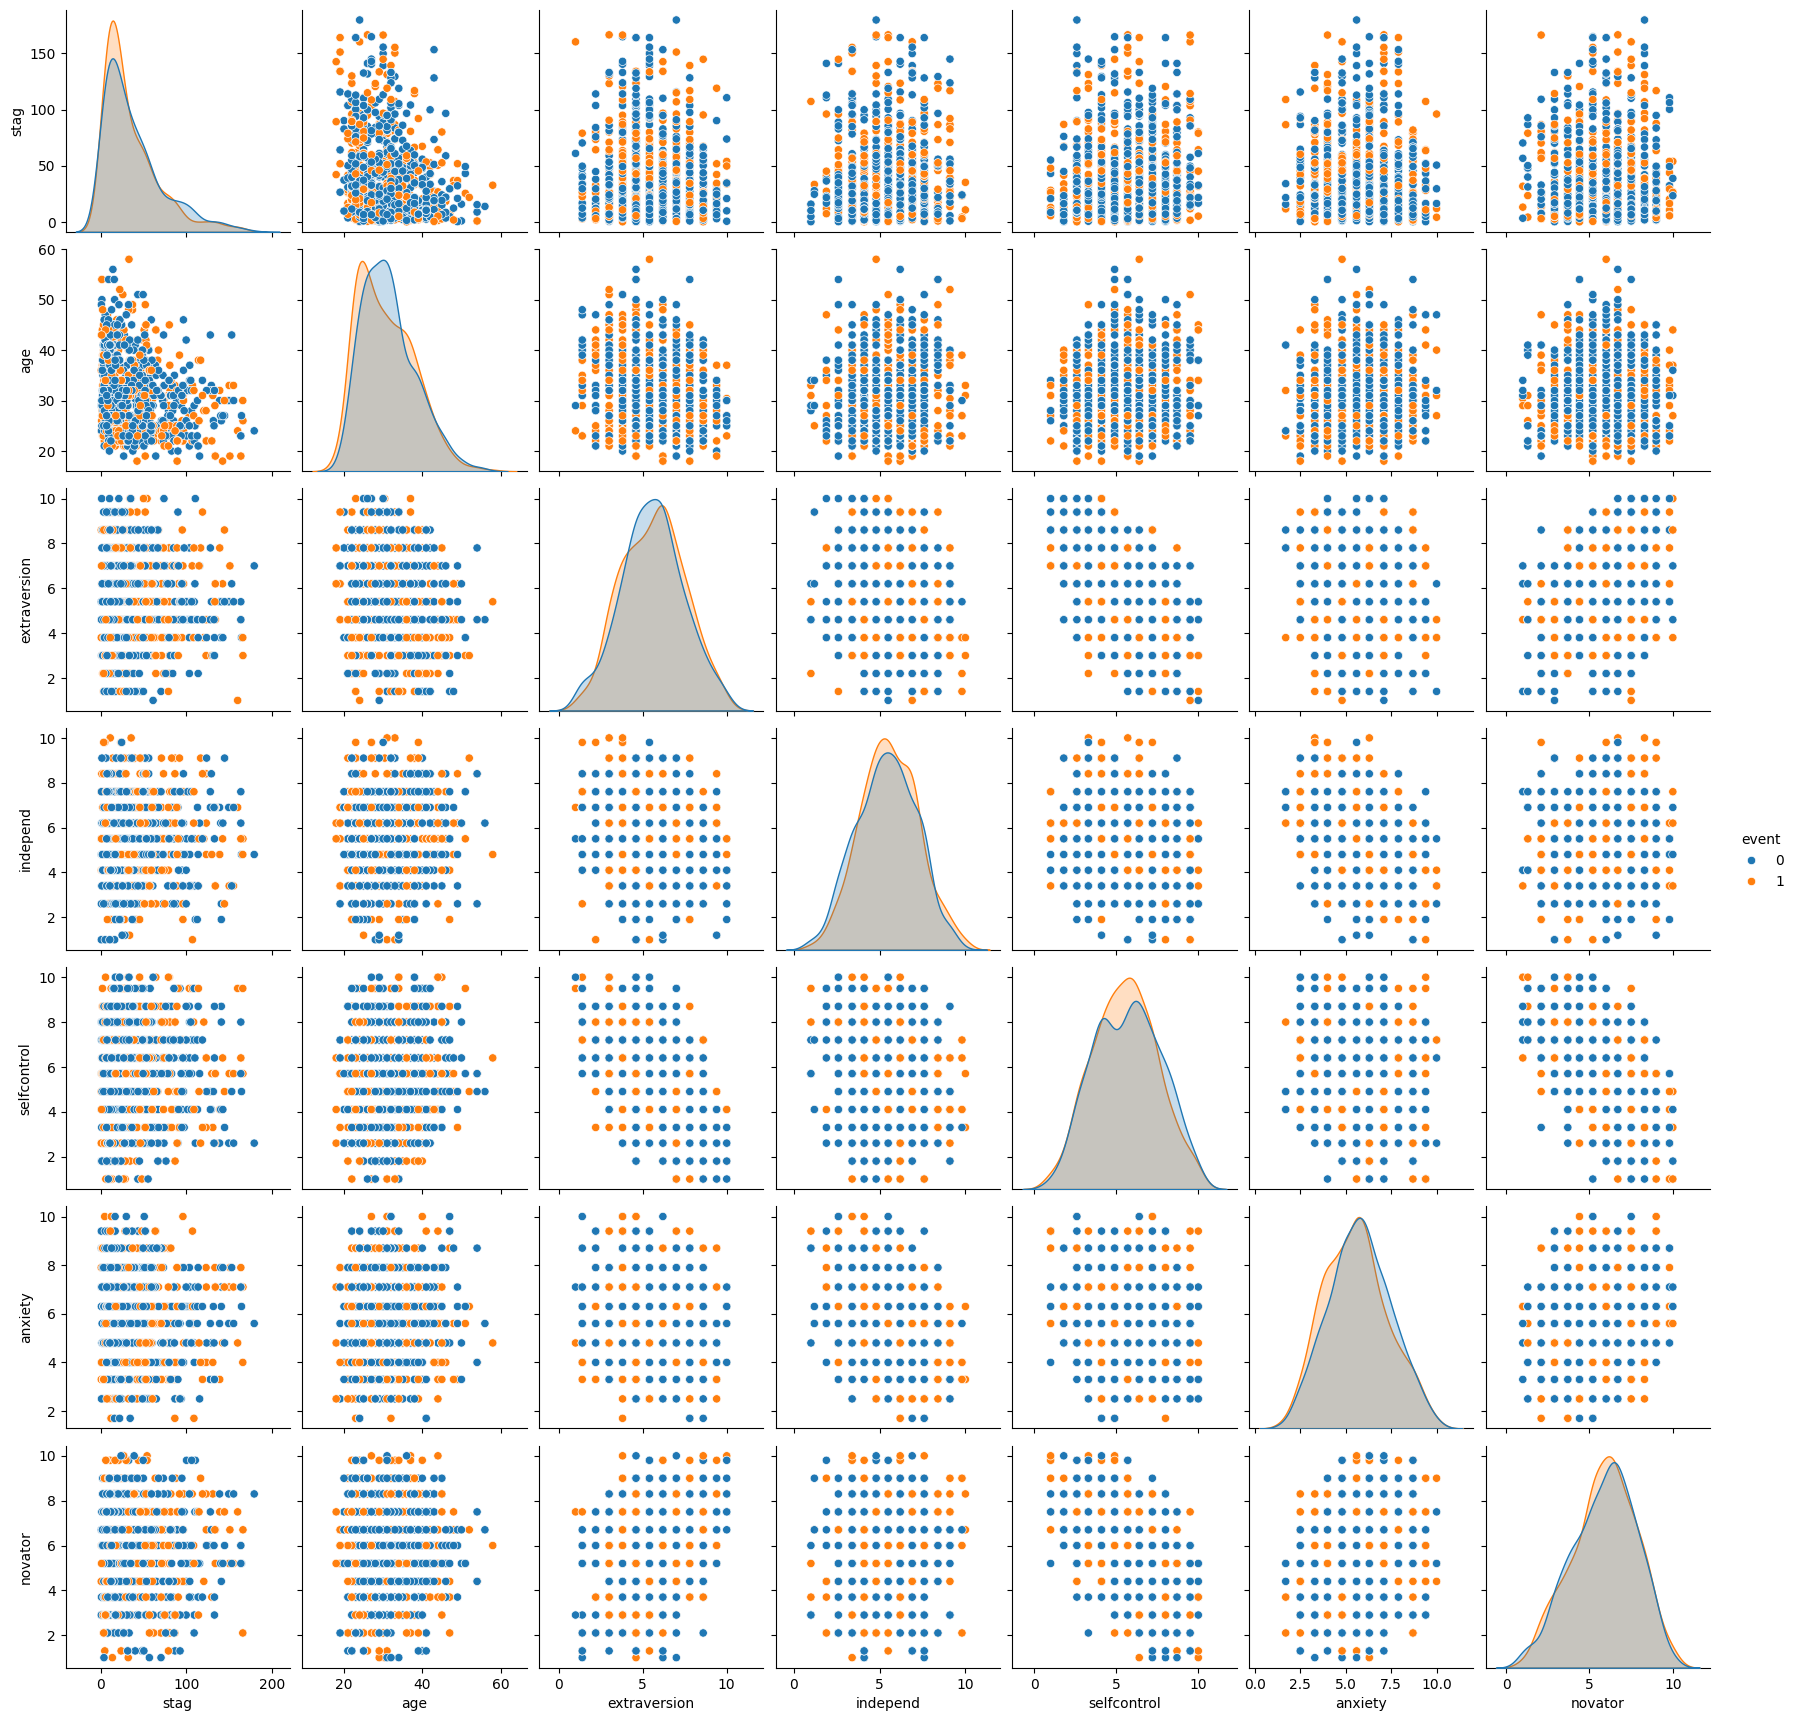

In [31]:
sns.pairplot(data, hue="event")
plt.show()

## Cramers V - Relation between categorical variables

- ES ≤ 0.2 : The result is weak. Although the result is statistically significant, the fields are only weakly associated.
- 0.2 < ES ≤ 0.6 : The result is moderate. The fields are moderately associated.
- ES > 0.6 : The result is strong. The fields are strongly associated.

** IBM

In [32]:
cat_cols = data.select_dtypes(include = "object").columns

In [33]:
cramers_v_values = {}

In [ ]:
for pair in combinations(cat_cols, 2):
    cramers_v_values[pair] = bt.cramers_v(data[pair[0]], data[pair[1]])

In [43]:
cramers_v_values_df = pd.DataFrame(
    list(cramers_v_values.values()), 
    index=cramers_v_values.keys(), 
    columns=['Value']
)

cramers_v_values_df["association"] = cramers_v_values_df["Value"].apply(lambda x: "weak" if x <= 0.2 else ("moderate" if x <= 6 else ("strong")) )
cramers_v_values_df.sort_values(by = "Value", ascending = False)

Value association
gender      profession   0.495589    moderate
profession  head_gender  0.337639    moderate
industry    head_gender  0.244577    moderate
            profession   0.238319    moderate
traffic     way          0.226518    moderate
gender      head_gender  0.209243    moderate
industry    way          0.204841    moderate
profession  traffic      0.194411        weak
gender      industry     0.186324        weak
traffic     head_gender  0.174848        weak
industry    traffic      0.172107        weak
profession  way          0.170256        weak
            greywage     0.161589        weak
gender      traffic      0.156853        weak
industry    greywage     0.151720        weak
            coach        0.147409        weak
gender      way          0.127190        weak
profession  coach        0.121348        weak
traffic     coach        0.112546        weak
coach       head_gender  0.108792        weak
traffic     greywage     0.106997        weak
greywage    way          0.102898        weak
head_gender way          0.101654        weak
coach       way          0.079533        weak
gender      coach        0.077274        weak
coach       greywage     0.054920        weak
head_gender greywage     0.026964        weak
gender      greywage     0.016613        weak